# Rozkład wykładniczy - $\text{Exp}(\lambda)$
Zmienna losowa $X$ ma rozkład wykładniczy z parametrem $\lambda>0$, jeżeli jej gęstość $f$~jest postaci
$$
      f(x)=\left.
    \begin{cases}
    \lambda\exp\{-\lambda x\} \quad &\text{dla} \quad x>0\\
    0 \quad &\text{dla} \quad x\leq 0,
    \end{cases}\right.
$$

Wartość oczekiwana i wariancja, dla $n>1$, dane są wzorami
$$
    \mathbb{E}X = \frac{1}{\lambda}, \quad \text{Var}(X) = \frac{1}{\lambda^2}.
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu wykładniczego.
2. Narysuj gęstość dla kilku wybranych wartości parametru lamba. Zwróć uwagę na dziedzinę gęstości.
3. Narysuj dystrybuantę dla kilku wybranych wartości parametru lamba.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.

In [2]:
# 1. Definicja
l = 2
exp2 = stats.expon(scale=1/l) # scale = 1/lambda

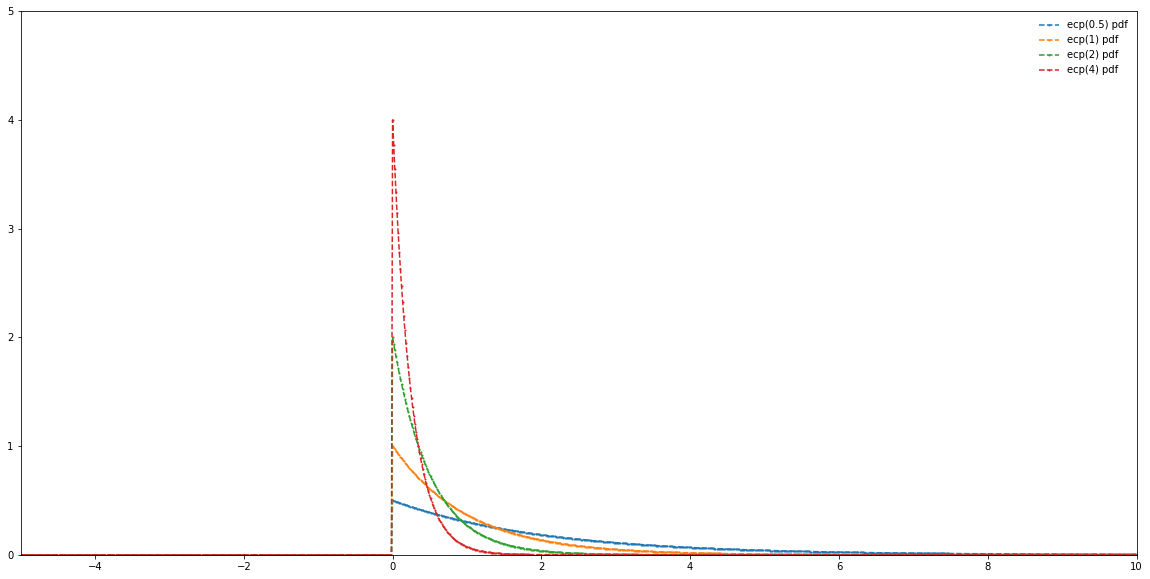

In [4]:
# 2. Gęstość
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-5, 10])
ax.set_ylim([0, 5])
x_value = np.linspace(-5, 10, 1000)

for l in [0.5, 1, 2, 4]:
    exp = stats.expon(scale=1/l)
    ax.plot(x_value, exp.pdf(x_value), 'o--', ms=1, label='ecp({}) pdf'.format(l))
ax.legend(loc='best', frameon=False)
plt.show()

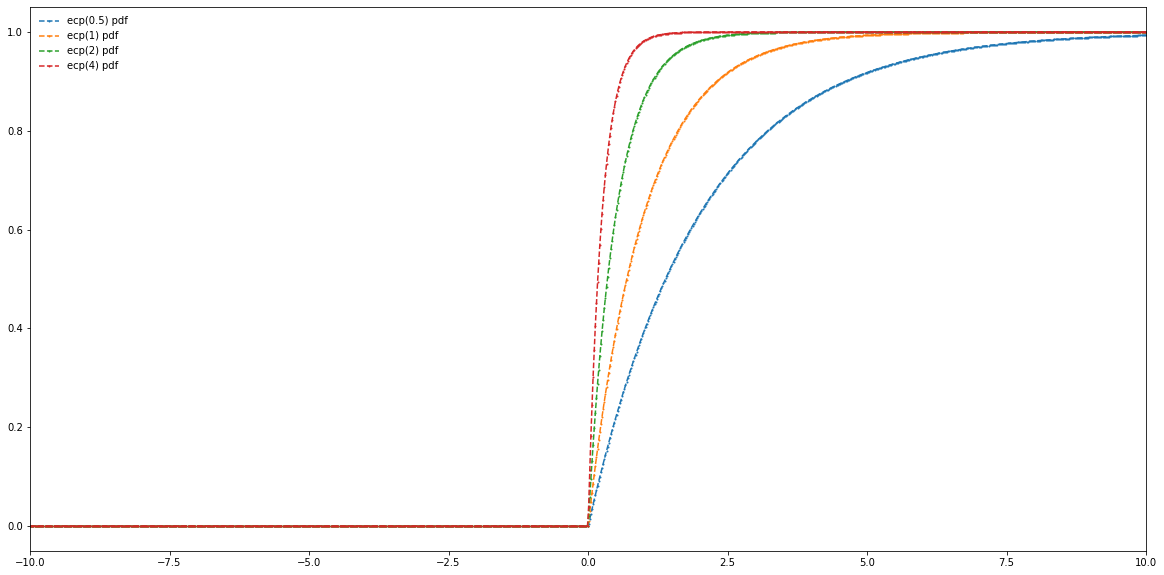

In [5]:
#3. Dystrybuanta
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-10, 10])
ax.set_ylim([-0.05, 1.05])
x_value = np.linspace(-10, 10, 1000)

for l in [0.5, 1, 2, 4]:
    exp = stats.expon(scale=1/l)
    ax.plot(x_value, exp.cdf(x_value), 'o--', ms=1, label='ecp({}) pdf'.format(l))
ax.legend(loc='best', frameon=False)
plt.show()

In [6]:
# 4
print(exp2.stats('mvsk'))
#odchylenie
print(np.sqrt(exp2.stats('v')))

(array(0.5), array(0.25), array(2.), array(6.))
0.5


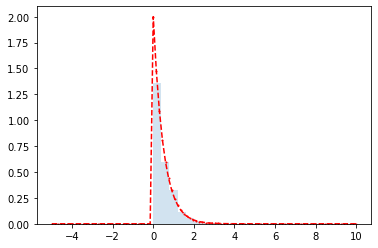

In [7]:
# 5 i 6
x = exp2.rvs(1000)

fig, ax = plt.subplots(1, 1)


ax.hist(x, histtype='stepfilled', alpha=0.2, density=True)

x_value = np.linspace(-5, 10, 100)
ax.plot(x_value, exp2.pdf(x_value), 'ro--', ms=1, label='exp(2) pdf')

plt.show()

## Zadanie

Czas przez jaki maszyna działa zanim ulegnie awarii (czyli odstep czasu miedzy dwiema kolejnymi awariami) ma
rozkład wykładniczy z paramterem $\lambda = 2$ (godziny). Jakie jest prawdopodobieństwo bezawaryjnej pracy maszyny
przez co najmniej 1 godzine? Jaki jest średni odstep czasu miedzy awariami?

$T$ - zm. losowa, opisująca czas przez jaki maszyna działa zanim ulegnie awarii,
$T \sim \text{Exp}(\lambda=2)$

In [15]:
# Jakie jest prawdopodobieństwo bezawaryjnej pracy maszyny przez co najmniej 1 godzine? 
# P(T >= 1) = 1 - P(T < 1) = 1 - F(1)

p1 = 1 - stats.expon.cdf(1, scale=1/2)
print('Prawdopodobieństwo bezawaryjnej pracy maszyny przez co najmniej 1 godzine: {}'.format(p1))

# Jaki jest średni odstep czasu miedzy awariami?
# ET = 1/lambda
et = 1/2

print("Średni odstep czasu miedzy awariami: {}".format(et))

#albo
print(stats.expon.stats(scale=1/2)[0])

Prawdopodobieństwo bezawaryjnej pracy maszyny przez co najmniej 1 godzine: 0.1353352832366127
Średni odstep czasu miedzy awariami: 0.5
0.5
